# Data Science Career Change Likelihood

* Student name: Vi Bui
* Student pace: Part-Time
* Scheduled project review date/time: 01/06/22
* Instructor name: Claude Fried
* Blog post URL: https://datasciish.com/

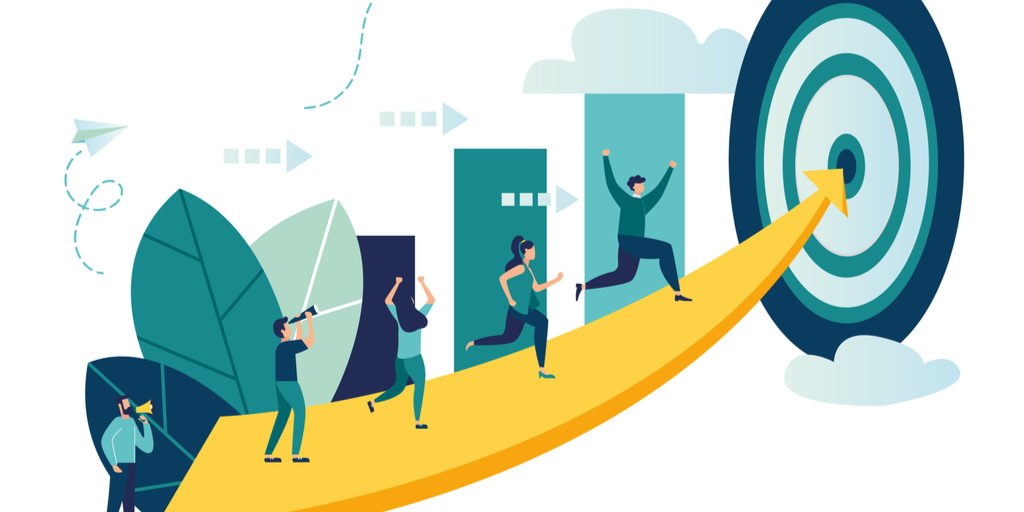

Data Science Career Change Likelihood

## Overview

**Client:** RADS - Recruiting Awesome Data Scientists Incorporation. Data Scientist recruiting firm looking for potential future Data Scientists. 

**Data, Methodology, and Analysis:** <br/> 

Data source: HR Analytics https://www.kaggle.com/arashnic/hr-analytics-job-change-of-data-scientists <br/>

Context: the data is from a company that is active in Big Data and Data Science and ran a training program with the intention to hire data scientists among people who successfully passed courses they conducted. 

This dataset includes current credentials, demographics, experience, education, which will help us build models for RADs about candidates that are likely to be looking for a job change. 




**Models:** 

1. Logistic Regression Classifier
2. Decision Tree Classifier
3. Random Forest Classifier
4. Gradient Booster Classifier 

# Data Exploration, Cleansing, Visualization, and Preparation

**Data Exploration** <br>
Explore HR Analytics data

**Data Cleansing** <br>
Check for duplicates; drop NaN (missing) values and unnecessary columns; continuously clean data as necessary 

**Data Visualization** <br>
Use visualizations to explore the data and determine how to further refine the dataset in order to prepare for modeling 

**Data Preparation** <br>
Prepare the data for modeling 

## Data Exploration and Cleansing
Import data and all packages needed for data exploration and modeling 

In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
%matplotlib inline 
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
import sklearn.preprocessing as preprocessing
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder, StandardScaler, MinMaxScaler
from sklearn.metrics import classification_report, accuracy_score
from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm, datasets
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay
from sklearn.feature_selection import RFE

import pydotplus 
from sklearn.tree import export_graphviz, plot_tree
from pydotplus import graph_from_dot_data
from IPython.display import Image
#from dtreeviz.trees import *

import os 
import warnings

In [2]:
# Import data

df = pd.read_csv('aug_train.csv',index_col=0)

In [3]:
# View dataframe

df

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours,target
enrollee_id,,,,,,,,,,,,,
8949,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,NaN,NaN,1,36,1.0
29725,city_40,0.776,Male,No relevent experience,no_enrollment,Graduate,STEM,15,50-99,Pvt Ltd,>4,47,0.0
11561,city_21,0.624,NaN,No relevent experience,Full time course,Graduate,STEM,5,NaN,NaN,never,83,0.0
33241,city_115,0.789,NaN,No relevent experience,NaN,Graduate,Business Degree,<1,NaN,Pvt Ltd,never,52,1.0
666,city_162,0.767,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,50-99,Funded Startup,4,8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
7386,city_173,0.878,Male,No relevent experience,no_enrollment,Graduate,Humanities,14,NaN,NaN,1,42,1.0
31398,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,14,NaN,NaN,4,52,1.0
24576,city_103,0.920,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,50-99,Pvt Ltd,4,44,0.0


In [4]:
# Explore columns and values 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19158 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19158 non-null  object 
 1   city_development_index  19158 non-null  float64
 2   gender                  14650 non-null  object 
 3   relevent_experience     19158 non-null  object 
 4   enrolled_university     18772 non-null  object 
 5   education_level         18698 non-null  object 
 6   major_discipline        16345 non-null  object 
 7   experience              19093 non-null  object 
 8   company_size            13220 non-null  object 
 9   company_type            13018 non-null  object 
 10  last_new_job            18735 non-null  object 
 11  training_hours          19158 non-null  int64  
 12  target                  19158 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


### Feature Description Definitions

**Features**

enrollee_id: Unique ID for candidate

city: City code

city_development_index: Development index of the city (scaled)

gender: Gender of candidate

relevant_experience: Relevant experience of candidate

enrolled_university: Type of University course enrolled if any

education_level: Education level of candidate

major_discipline: Education major discipline of candidate

experience: Candidate total experience in years

company_size: Number of employees in current employer's company

company_type: Type of current employer

lastnewjob: Difference in years between previous job and current job

training_hours: Data science course training hours completed

target: 0 – Not looking for job change, 1 – Looking for a job change

In [5]:
# Check for duplicates

df.duplicated().sum()

49

In [6]:
# Drop duplicates

df = df.drop_duplicates()

In [7]:
# Check there are no duplicates remaining

df.duplicated().sum()

0

In [8]:
# Check sum of Missing (NaN) values 

df.isna().sum()

city                         0
city_development_index       0
gender                    4508
relevent_experience          0
enrolled_university        386
education_level            460
major_discipline          2809
experience                  65
company_size              5920
company_type              6122
last_new_job               423
training_hours               0
target                       0
dtype: int64

In [9]:
# Create formula to observe percentages of the values missing 

df_missing = df.isna().sum()
df_missing/len(df)

city                      0.000000
city_development_index    0.000000
gender                    0.235910
relevent_experience       0.000000
enrolled_university       0.020200
education_level           0.024072
major_discipline          0.146999
experience                0.003402
company_size              0.309802
company_type              0.320373
last_new_job              0.022136
training_hours            0.000000
target                    0.000000
dtype: float64

In [10]:
# Check data types 

df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 19109 entries, 8949 to 23834
Data columns (total 13 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    19109 non-null  object 
 1   city_development_index  19109 non-null  float64
 2   gender                  14601 non-null  object 
 3   relevent_experience     19109 non-null  object 
 4   enrolled_university     18723 non-null  object 
 5   education_level         18649 non-null  object 
 6   major_discipline        16300 non-null  object 
 7   experience              19044 non-null  object 
 8   company_size            13189 non-null  object 
 9   company_type            12987 non-null  object 
 10  last_new_job            18686 non-null  object 
 11  training_hours          19109 non-null  int64  
 12  target                  19109 non-null  float64
dtypes: float64(2), int64(1), object(10)
memory usage: 2.0+ MB


In [11]:
# Drop 65 NaN values in 'experience'

df = df.dropna(subset=['experience'])

In [12]:
# Check there are no NaN values remaining for 'experience'

df.isna().sum()

city                         0
city_development_index       0
gender                    4459
relevent_experience          0
enrolled_university        381
education_level            450
major_discipline          2792
experience                   0
company_size              5897
company_type              6086
last_new_job               399
training_hours               0
target                       0
dtype: int64

In [13]:
# Explore the value counts of each feature

for col in df.columns:
    print(df[col].value_counts())

city_103    4300
city_21     2680
city_16     1527
city_114    1334
city_160     842
            ... 
city_121       3
city_111       3
city_129       3
city_171       1
city_140       1
Name: city, Length: 123, dtype: int64
0.920    5142
0.624    2680
0.910    1527
0.926    1334
0.698     676
         ... 
0.649       4
0.807       4
0.781       3
0.625       3
0.664       1
Name: city_development_index, Length: 93, dtype: int64
Male      13161
Female     1236
Other       188
Name: gender, dtype: int64
Has relevent experience    13705
No relevent experience      5339
Name: relevent_experience, dtype: int64
no_enrollment       13733
Full time course     3733
Part time course     1197
Name: enrolled_university, dtype: int64
Graduate          11524
Masters            4343
High School        2009
Phd                 411
Primary School      307
Name: education_level, dtype: int64
STEM               14406
Humanities           668
Other                377
Business Degree      326
Arts       

## Data Visualization 

<AxesSubplot:xlabel='gender', ylabel='count'>

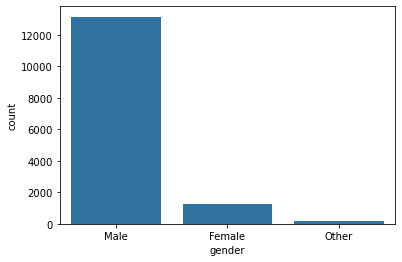

In [14]:
sns.countplot(x='gender',data=df, color='tab:blue')

In [15]:
df['gender'].value_counts()

Male      13161
Female     1236
Other       188
Name: gender, dtype: int64

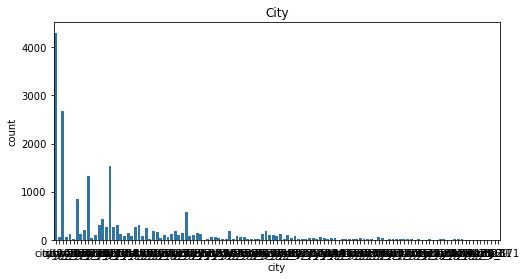

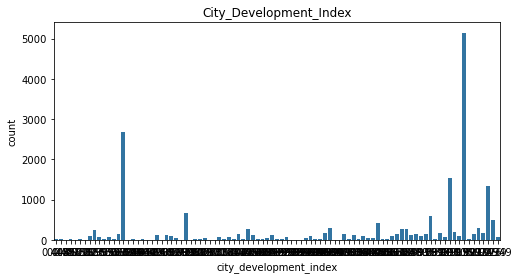

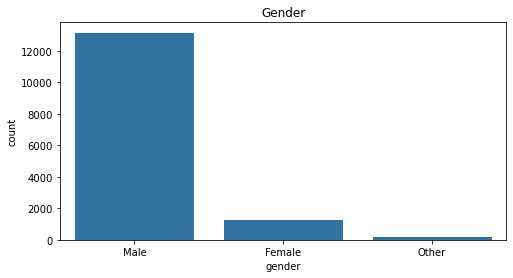

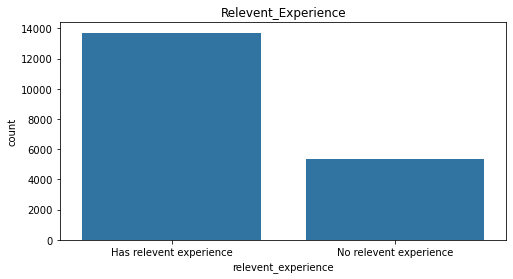

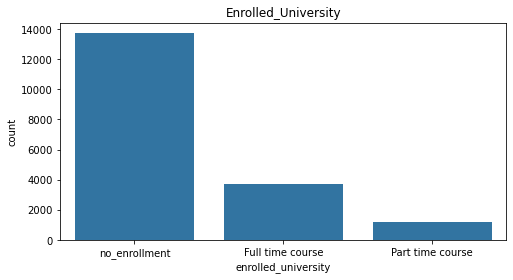

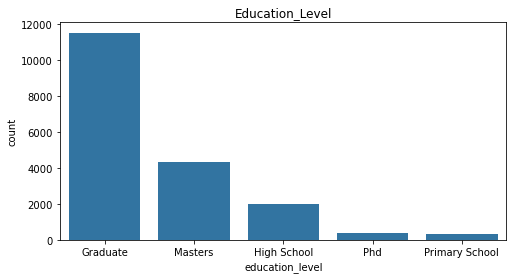

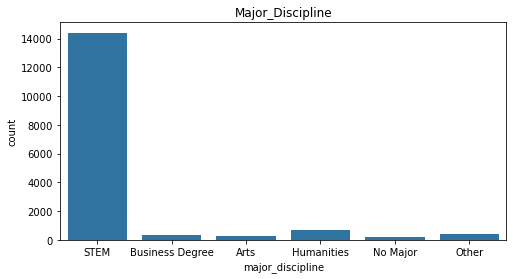

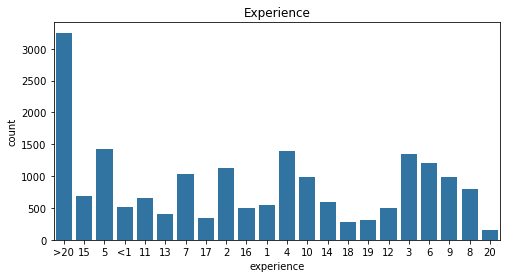

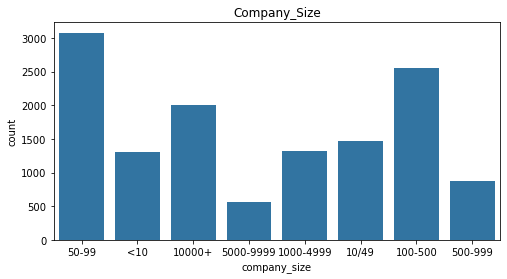

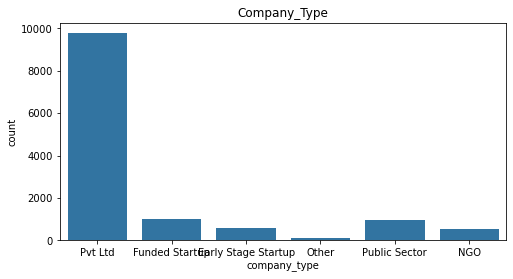

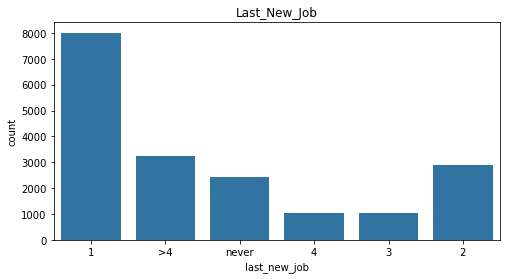

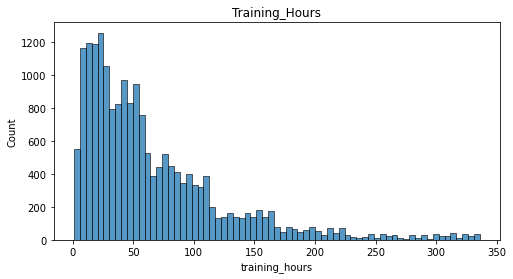

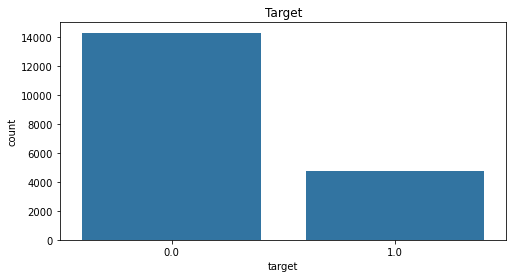

In [16]:
for col in df.columns:
    fig,ax=plt.subplots(figsize=(8,4))
    if col!='training_hours':
        sns.countplot(x=col,data=df,ax=ax,color='tab:blue')
    else:
        sns.histplot(x=col,data=df,ax=ax,color='tab:blue')
    ax.set(title=col.title())
    plt.show()

In [17]:
# Calculate % of Gender 

gender_percent = (df['gender'].value_counts()/len(df['gender']))*100
gender_percent

Male      69.108381
Female     6.490233
Other      0.987188
Name: gender, dtype: float64

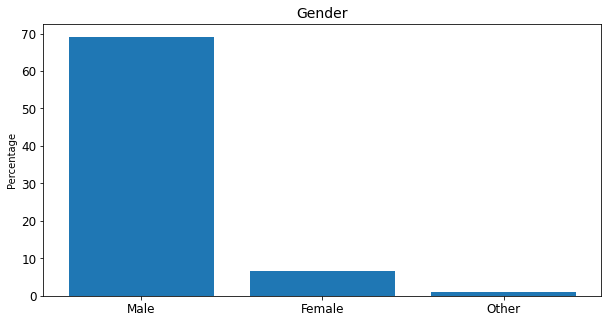

In [18]:
# Create cleaner visualizations for presentation 
# Gender - Graph #1 

data = {'Male':69.1, 'Female':6.5, 'Other':1}
gender = list(data.keys())
values = list(data.values())
  
fig = plt.figure(figsize = (10, 5))
 
plt.bar(gender, values, color ='tab:blue')
 
plt.ylabel("Percentage", fontsize=10)
plt.title("Gender",fontsize=14)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
ax.grid(False)
plt.show()

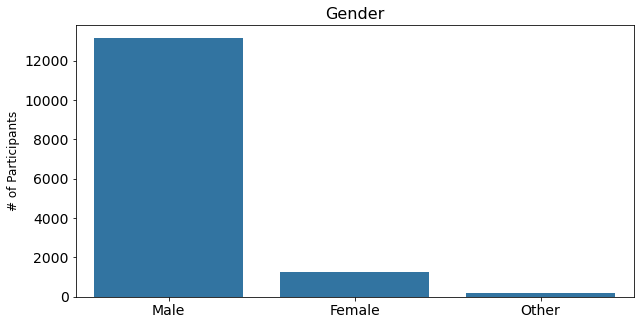

In [19]:
# Create cleaner visualizations for presentation 
# Gender - Graph #2

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='gender',data=df, color='tab:blue');
ax.grid(False)

plt.xlabel(None)
plt.ylabel("# of Participants", fontsize=12)
plt.title("Gender",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.grid(False)
plt.show()

In [20]:
# Calculate % of each major_discipline

major_percent = (df['major_discipline'].value_counts()/len(df['major_discipline']))*100
major_percent

STEM               75.645873
Humanities          3.507666
Other               1.979626
Business Degree     1.711825
Arts                1.323251
No Major            1.170972
Name: major_discipline, dtype: float64

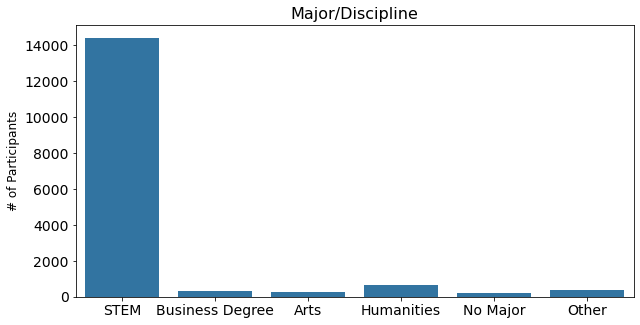

In [21]:
# Create cleaner visualizations for presentation 
# Major/Discipline

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='major_discipline',data=df, color='tab:blue');
ax.grid(False)

plt.xlabel(None)
plt.ylabel("# of Participants", fontsize=12)
plt.title("Major/Discipline",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.grid(False)
plt.show()

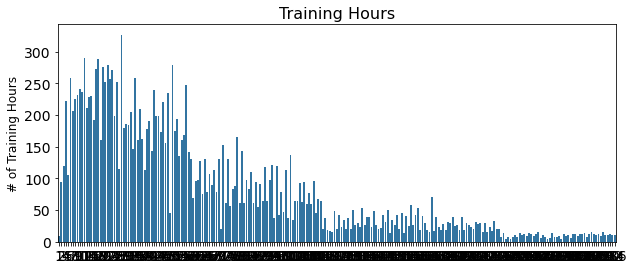

<Figure size 432x288 with 0 Axes>

In [22]:
# Create cleaner visualizations for presentation 
# Training Hours - original graph is cleaner 

fig, ax = plt.subplots(figsize=(10,4))
sns.countplot(x='training_hours',data=df, color='tab:blue');
ax.grid(False)

plt.xlabel(None)
plt.ylabel("# of Training Hours", fontsize=12)
plt.title("Training Hours",fontsize=16)
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
ax.grid(False)
plt.show()
plt.tight_layout()

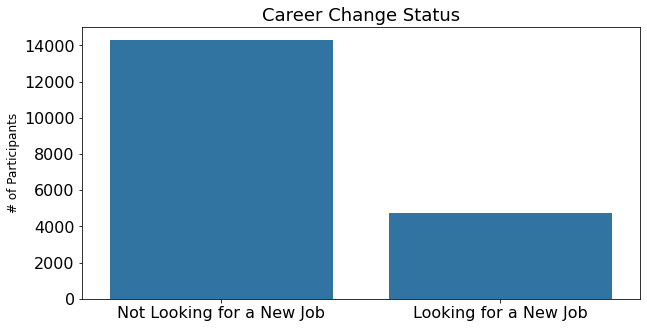

In [23]:
# Create cleaner visualizations for presentation 
# Career Change Status 

fig, ax = plt.subplots(figsize=(10,5))
sns.countplot(x='target',data=df, color='tab:blue');
ax.grid(False)
#ax.set_title('Target'); 
#ax.set(xlabel=None, ylabel = "Count");
ax.xaxis.set_ticklabels(['Not Looking for a New Job', 
                         'Looking for a New Job']);

plt.xlabel(None)
plt.ylabel("# of Participants", fontsize=12)
plt.title("Career Change Status",fontsize=18)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.show()

## Data Preparation 

### Create y (Target) and X

In [24]:
# Create y (Target)
# Create X

y = df['target']
X = df.drop(columns=['target'])

### Check for Class Imbalance

In [25]:
# Check for class imbalance 

y.value_counts(normalize=True)

0.0    0.750998
1.0    0.249002
Name: target, dtype: float64

The data is imbalanced

### Train Test Split the Data

In [26]:
# Create Train and Test data subsets using train_test_split
# Check shape of each data set 

X_train, X_test, y_train, y_test = train_test_split(
    X, y, random_state=100, stratify=y)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((14283, 12), (4761, 12), (14283,), (4761,))

In [27]:
# Check the shape of the data is the same

X_train.shape[0]+X_test.shape[0]==df.shape[0]

True

### Impute, Fit, and Transform the Data

- We believe the missing values in the dataset will be useful for our modeling <br/> 
- Impute NaN values to "Missing" vs. not using the data 

In [28]:
# Impute NaN values to "Missing"

X_train_processed = X_train.fillna('Missing')
X_test_processed = X_test.fillna('Missing')

In [29]:
# Check Train data - no missing values remaining 

X_train_processed.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [30]:
# Check Train data - no missing values remaining 

X_test_processed.isna().sum()

city                      0
city_development_index    0
gender                    0
relevent_experience       0
enrolled_university       0
education_level           0
major_discipline          0
experience                0
company_size              0
company_type              0
last_new_job              0
training_hours            0
dtype: int64

In [31]:
# Explore data and datatypes

X_train_processed.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 14283 entries, 3921 to 1762
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    14283 non-null  object 
 1   city_development_index  14283 non-null  float64
 2   gender                  14283 non-null  object 
 3   relevent_experience     14283 non-null  object 
 4   enrolled_university     14283 non-null  object 
 5   education_level         14283 non-null  object 
 6   major_discipline        14283 non-null  object 
 7   experience              14283 non-null  object 
 8   company_size            14283 non-null  object 
 9   company_type            14283 non-null  object 
 10  last_new_job            14283 non-null  object 
 11  training_hours          14283 non-null  int64  
dtypes: float64(1), int64(1), object(10)
memory usage: 1.4+ MB


In [32]:
# Look at X_train_processed dataframe

X_train_processed

,city,city_development_index,gender,relevent_experience,enrolled_university,education_level,major_discipline,experience,company_size,company_type,last_new_job,training_hours
enrollee_id,,,,,,,,,,,,
3921,city_36,0.893,Missing,No relevent experience,no_enrollment,Phd,STEM,>20,1000-4999,Public Sector,>4,4
21627,city_21,0.624,Missing,No relevent experience,Full time course,Graduate,STEM,<1,<10,Pvt Ltd,1,17
24478,city_83,0.923,Male,Has relevent experience,no_enrollment,Masters,STEM,16,50-99,Pvt Ltd,1,96
32459,city_114,0.926,Male,No relevent experience,Full time course,Graduate,STEM,6,Missing,Pvt Ltd,never,16
4033,city_114,0.926,Male,Has relevent experience,no_enrollment,Graduate,STEM,>20,100-500,Pvt Ltd,2,32
...,...,...,...,...,...,...,...,...,...,...,...,...
17425,city_136,0.897,Male,Has relevent experience,Part time course,Masters,STEM,7,50-99,Pvt Ltd,1,65
22588,city_61,0.913,Male,Has relevent experience,no_enrollment,Graduate,No Major,>20,100-500,Pvt Ltd,1,39
9372,city_16,0.910,Male,Has relevent experience,no_enrollment,Masters,STEM,>20,10000+,Pvt Ltd,2,39


In [33]:
# Clean 'experience' feature
# Change from string to integer

for df in (X_train_processed, X_test_processed):
    df['experience'] = df['experience'].apply(lambda x: x.replace('>',''))
    df['experience'] = df['experience'].apply(lambda x: x.replace('<',''))
    df['experience'] = df['experience'].astype(int)

In [34]:
# Look at 'experience' data column 

X_train_processed['experience']

enrollee_id
3921     20
21627     1
24478    16
32459     6
4033     20
         ..
17425     7
22588    20
9372     20
18874     6
1762      6
Name: experience, Length: 14283, dtype: int64

In [35]:
# Explore the Train data using .describe()

X_train_processed.describe()

,city_development_index,experience,training_hours
count,14283.000000,14283.000000,14283.000000
mean,0.828626,9.940209,65.323461
std,0.123131,6.435927,59.952557
min,0.448000,1.000000,1.000000
25%,0.740000,4.000000,23.000000
50%,0.899000,9.000000,47.000000
75%,0.920000,16.000000,88.000000
max,0.949000,20.000000,336.000000


In [36]:
# Explore the Test data using .describe()

X_test_processed.describe()

,city_development_index,experience,training_hours
count,4761.000000,4761.000000,4761.000000
mean,0.829697,9.940559,65.712665
std,0.123812,6.524810,60.515681
min,0.448000,1.000000,1.000000
25%,0.740000,4.000000,23.000000
50%,0.910000,8.000000,47.000000
75%,0.920000,16.000000,89.000000
max,0.949000,20.000000,336.000000


In [37]:
# Create variable for "number" columns (integers, floats)
# Create variable for "category" columns (objects, strings)
# Check CATEGORY COLUMNS 

NUMBER_COLUMNS = X_train_processed.select_dtypes('number').columns

CATEGORY_COLUMNS = X_train_processed.select_dtypes('object').columns
CATEGORY_COLUMNS

Index(['city', 'gender', 'relevent_experience', 'enrolled_university',
       'education_level', 'major_discipline', 'company_size', 'company_type',
       'last_new_job'],
      dtype='object')

In [38]:
# Check NUMBER COLUMNS

NUMBER_COLUMNS

Index(['city_development_index', 'experience', 'training_hours'], dtype='object')

### One Hot Encode Category Columns 

In [39]:
# ONE HOT ENCODE 

ohe = OneHotEncoder(handle_unknown='ignore',sparse=False)
X_train_ohe = ohe.fit_transform(X_train_processed[CATEGORY_COLUMNS])
X_test_ohe = ohe.transform(X_test_processed[CATEGORY_COLUMNS])

# CHECK
X_train_ohe = pd.DataFrame(
    X_train_ohe, columns=ohe.get_feature_names(CATEGORY_COLUMNS))
X_test_ohe = pd.DataFrame(
    X_test_ohe, columns=ohe.get_feature_names(CATEGORY_COLUMNS))

**Reset Index**

In [40]:
for df in (X_train_processed, X_test_processed, 
            y_train, y_test, X_train_ohe, X_test_ohe):
    df.reset_index(drop=True, inplace=True)

### CREATE X_train and X_test data 
Concatenate OHE Data with Number Columns 

In [41]:
# Concatenate Number Columns with One Hot Encoded Columns 

X_train = pd.concat([X_train_processed[NUMBER_COLUMNS], 
                        X_train_ohe], 
                        axis=1)
X_test = pd.concat([X_test_processed[NUMBER_COLUMNS], 
                        X_test_ohe], 
                        axis=1)

In [42]:
# Look at X_train data

X_train

,city_development_index,experience,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,...,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_Missing,last_new_job_never
0,0.893,20,4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.624,1,17,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.923,16,96,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.926,6,16,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.926,20,32,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14278,0.897,7,65,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14279,0.913,20,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
14280,0.910,20,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
14281,0.866,6,144,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [43]:
# Look at X_test data

X_test

,city_development_index,experience,training_hours,city_city_1,city_city_10,city_city_100,city_city_101,city_city_102,city_city_103,city_city_104,...,company_type_Other,company_type_Public Sector,company_type_Pvt Ltd,last_new_job_1,last_new_job_2,last_new_job_3,last_new_job_4,last_new_job_>4,last_new_job_Missing,last_new_job_never
0,0.579,7,30,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.890,14,39,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
2,0.920,12,80,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.624,10,19,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.766,7,54,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4756,0.624,11,158,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4757,0.920,8,66,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4758,0.624,15,5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
4759,0.920,13,116,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
# Ensure there are no remaining NaN values in Train data 

X_train.isna().sum()

city_development_index    0
experience                0
training_hours            0
city_city_1               0
city_city_10              0
                         ..
last_new_job_3            0
last_new_job_4            0
last_new_job_>4           0
last_new_job_Missing      0
last_new_job_never        0
Length: 172, dtype: int64

In [45]:
# Ensure there are no remaining NaN values in Test data 

X_test.isna().sum()

city_development_index    0
experience                0
training_hours            0
city_city_1               0
city_city_10              0
                         ..
last_new_job_3            0
last_new_job_4            0
last_new_job_>4           0
last_new_job_Missing      0
last_new_job_never        0
Length: 172, dtype: int64

# CLASSIFICATION MODELS

## Logistic Regression Model

In [46]:
logreg = LogisticRegression()
log_reg_model = logreg.fit(X_train, y_train)
log_reg_model

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [47]:
from sklearn.feature_selection import RFE

rfe = RFE(estimator = log_reg_model, 
          n_features_to_select = 20, step=1)

rfe = rfe.fit(X_train, y_train)

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/l

In [48]:
ranking = rfe.ranking_
ranking

array([  1, 128, 147,  35,  87,  12,  24,  76,   1,  53,  62,  85,  42,
       104,   1,  32,  78,   1,  46,  44, 124,  88, 150,  95, 101,  41,
        70,  23,  68,  74,  60,  56,  30,  55,  52,  19, 109, 129,  65,
       116,   1,   1,  67, 152,  48,  14, 136,   1,  89,   5,  59,  80,
         1,   6,   1,  96, 151,   7,  81,  57, 102,   1,  45,  37, 100,
         1,  61,   1,  97,  11,   9, 130,  22,  79, 121,   3,  43,  71,
        33,  28,  64,  20,   1,  54, 143, 103,  38, 111,  69,  40,  31,
       123,  47,  84,  72,   1,  10,  15,  51,  73,   8,  36,  82,  63,
       141,   1,  77, 125,   1,  29,  92,   1,  27, 153,  16,  13,  94,
       148,   2,  90,  34,   1, 139,  50,  75, 144, 137, 120, 134,  86,
        39, 149,  58, 145,  66, 142,  17,  93,  18, 132,  21,   1, 138,
       106, 108, 110, 119, 131, 107,  49,  98, 117, 146, 122, 133, 135,
       118,   1, 127,  83,  26, 140, 105,  25,  99, 115, 113, 112, 114,
       126,  91,   4])

In [49]:
y_pred_train = logreg.predict(X_train)
print('Accuracy of logistic regression classifier on test set: {:.2f}'
      .format(logreg.score(X_train, y_train)))

Accuracy of logistic regression classifier on test set: 0.78


In [50]:
y_pred_test = logreg.predict(X_test)
print('Accuracy of logistic regression classifier on test set: {:.2f}'
      .format(logreg.score(X_test, y_test)))

Accuracy of logistic regression classifier on test set: 0.79


### Classification Report

**Understanding the Classification Report**

- The classification report assesses the quality of a model
- **Precision** measures how precise the predictors are <br> Precision = Number of True Positives/Number of Predicted Positives
-**Recall** is the percentage of the class that is captured by the model <br> Recall = Number of True Positives/Number of Actual Total Positives
-**F-1 Score** is a weighted average of Precision and Recall (also called the "Harmonic Mean") <br> F-1 Score = 2 * (Precision * Recall)/(Precision + Recall)
-**Accuracy** is the percentage of predictions the model got right  <br> Accuracy = Number of Correct Predictions/Total Number of Predictions 

**Because our data is imbalanced and 75% of the candidates are "Not Looking for a Job Change," the metric we use to measure our models' performances is Recall because we care most about how our models predict True Positives (employees "Looking for a Job Change") that actually are looking for a job change**

In [51]:
print('Classification Report for Training Data')

print(classification_report(y_train, y_pred_train, 
                            target_names=['Not Looking for Job Change', 
                                          'Looking for a Job Change']))

print('Classification Report for Test Data')

print(classification_report(y_test, y_pred_test, 
                            target_names=['Not Looking for Job Change', 
                                          'Looking for a Job Change']))

Classification Report for Training Data
                            precision    recall  f1-score   support

Not Looking for Job Change       0.82      0.91      0.86     10726
  Looking for a Job Change       0.60      0.39      0.48      3557

                  accuracy                           0.78     14283
                 macro avg       0.71      0.65      0.67     14283
              weighted avg       0.77      0.78      0.77     14283

Classification Report for Test Data
                            precision    recall  f1-score   support

Not Looking for Job Change       0.82      0.92      0.87      3576
  Looking for a Job Change       0.61      0.40      0.48      1185

                  accuracy                           0.79      4761
                 macro avg       0.72      0.66      0.67      4761
              weighted avg       0.77      0.79      0.77      4761



### Confusion Matrixes

**Understanding the Confusion Matrix** 

Every item in a Binary Classification dataset has a ground-truth value of 1 or 0. The Confusion Matrix helps us understand: 

True Positives (TP): The number of observations where the model predicted the instance to be true (1), and it is actually true (1). In our case, where our model predicts a candidate is looking for a new job, and they are actually looking for a new job. 

True Negatives (TN): The number of observations where the model predicted the instance to be not true (0), and the instance is actually not true (0). In our case, where our model predicts a candidate is not looking for a new job, and they are actually not looking for a new job. 

False Positives (FP): The number of observations where the model predicted the instance to be true (1), but the instance is actually not true (0). In our case, where our model predicts a candidate is looking for a new job, and they are actually not looking for a new job. 

False Negatives (FN): The number of observations where the model predicted the instance to be not true (0), but the instance is actually true (1). In our case, where our model predicts a candidate is not looking for a new job, and they are actually looking for a new job. 

In [52]:
train_data_confusion_matrix = confusion_matrix(y_train, y_pred_train)
print("Training Data Confusion Matrix")
print(train_data_confusion_matrix)

test_data_confusion_matrix = confusion_matrix(y_test, y_pred_test)
print("Test Data Confusion Matrix")
print(test_data_confusion_matrix)

Training Data Confusion Matrix
[[9808  918]
 [2160 1397]]
Test Data Confusion Matrix
[[3280  296]
 [ 716  469]]


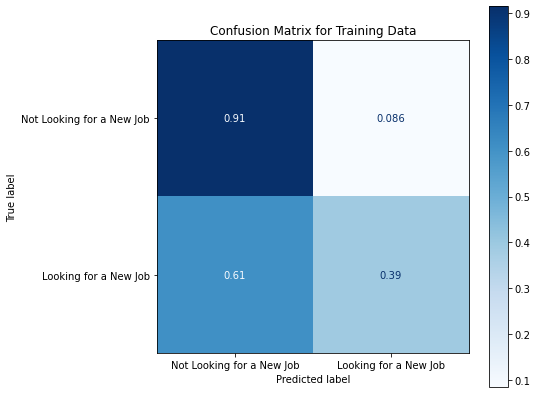

In [53]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(
    log_reg_model, X_train, y_train, cmap='Blues', ax=ax, normalize='true')
ax.grid(False)
ax.set_title('Confusion Matrix for Training Data'); 
ax.xaxis.set_ticklabels(['Not Looking for a New Job', 'Looking for a New Job']); 
ax.yaxis.set_ticklabels(['Not Looking for a New Job', 'Looking for a New Job']);

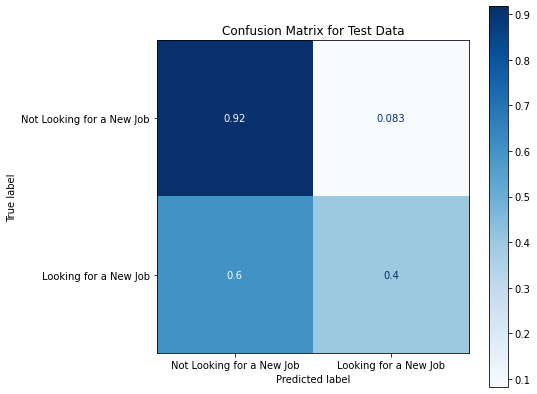

In [54]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(
    log_reg_model, X_test, y_test, cmap='Blues', ax=ax, normalize='true')
ax.grid(False)
ax.set_title('Confusion Matrix for Test Data'); 
ax.xaxis.set_ticklabels(['Not Looking for a New Job', 'Looking for a New Job']); 
ax.yaxis.set_ticklabels(['Not Looking for a New Job', 'Looking for a New Job']);

### ROC Curve

Scikit-learn's built in roc_curve method returns the fpr, tpr, and thresholds for various decision boundaries given the case member probabilites

In [55]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

# First calculate the probability scores of each of the datapoints:
y_score = logreg.fit(X_train, y_train).decision_function(X_test)

fpr, tpr, thresholds = roc_curve(y_test, y_score)

/Users/v/opt/anaconda3/envs/learn-env/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [56]:
print('AUC: {}'.format(auc(fpr, tpr)))

AUC: 0.7964694305213378


AUC: 0.7964694305213378


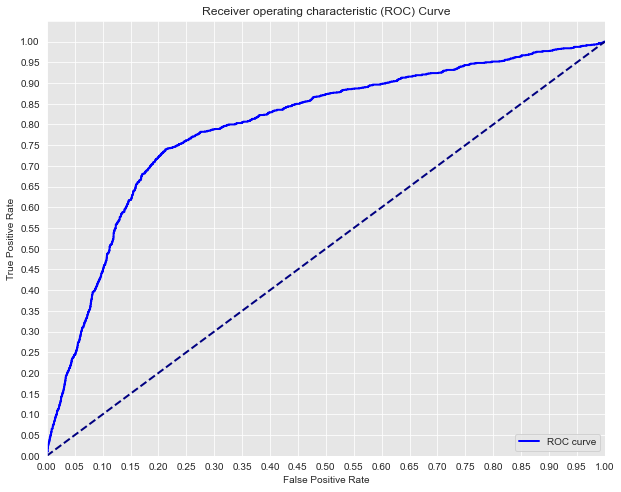

In [57]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

sns.set_style('darkgrid', {'axes.facecolor': '0.9'})

print('AUC: {}'.format(auc(fpr, tpr)))
plt.figure(figsize=(10, 8))
lw = 2
plt.plot(fpr, tpr, color='blue',
         lw=lw, label='ROC curve')
plt.plot([0, 1], [0, 1], color='navy', lw=lw, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.yticks([i/20.0 for i in range(21)])
plt.xticks([i/20.0 for i in range(21)])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

## Decision Tree Classifier

In [58]:
decision_tree_model = DecisionTreeClassifier(
    max_depth=4,random_state=100, class_weight='balanced')

decision_tree_model.fit(X_train, y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=4, random_state=100)

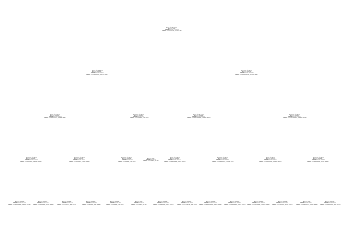

In [59]:
tree.plot_tree(decision_tree_model);

In [60]:
y_pred_train = decision_tree_model.predict(X_train)
y_pred_test = decision_tree_model.predict(X_test)

### Classification Report - Pre-Tuning

In [61]:
print('Classification Report for Training Data')

print(classification_report(y_train, y_pred_train, 
                            target_names=['Not Looking for Job Change', 
                                          'Looking for a Job Change']))

print('Classification Report for Test Data')

print(classification_report(y_test, y_pred_test, 
                            target_names=['Not Looking for Job Change', 
                                          'Looking for a Job Change']))

Classification Report for Training Data
                            precision    recall  f1-score   support

Not Looking for Job Change       0.91      0.74      0.81     10726
  Looking for a Job Change       0.49      0.77      0.60      3557

                  accuracy                           0.74     14283
                 macro avg       0.70      0.75      0.71     14283
              weighted avg       0.80      0.74      0.76     14283

Classification Report for Test Data
                            precision    recall  f1-score   support

Not Looking for Job Change       0.91      0.74      0.81      3576
  Looking for a Job Change       0.50      0.78      0.61      1185

                  accuracy                           0.75      4761
                 macro avg       0.70      0.76      0.71      4761
              weighted avg       0.81      0.75      0.76      4761



### Grid Search

In [62]:
# Hyperparameter Tuning and Pruning
# Scoring on Recall

from sklearn.model_selection import GridSearchCV

my_param_grid = {'max_depth': [None, 2, 6, 10],
                 'min_samples_split': [2, 6, 12],
                 'criterion': ['gini','entropy'],
                 'max_features': ['auto','sqrt','log2']}

decision_tree_model_gridsearch = GridSearchCV(
    decision_tree_model, param_grid=my_param_grid,verbose=2,scoring='recall')

decision_tree_model_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 72 candidates, totalling 360 fits
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_split=2 


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.1s remaining:    0.0s


[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_split=2 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_split=2, total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_split=6 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_split=6, total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_split=6 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_split=6, total=   0.1s
[CV] criterion=gini, max_depth=None, max_features=auto, min_samples_split=6 
[CV]  criterion=gini, max_depth=None, max_features=auto, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=None, max_features=auto, min_sam

[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_split=12, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_split=12 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_split=12, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=auto, min_samples_split=12 
[CV]  criterion=gini, max_depth=2, max_features=auto, min_samples_split=12, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2 
[CV]  criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=2, max_features=sqrt, min_samples_split=2 
[CV]  criterion=g

[CV]  criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=6 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=6 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=6, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=12 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=12, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=12 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=12, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=12 
[CV]  criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=12, total=   0.0s
[CV] criterion=gini, max_depth=6, max_features=sqrt, min_samples_split=12 
[CV]  criterion

[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=12, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=12 
[CV]  criterion=gini, max_depth=10, max_features=sqrt, min_samples_split=12, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_split=2 
[CV]  criterion=gini, max_depth=10, max_features=log2, min_samples_split=2, total=   0.0s
[CV] criterion=gini, max_depth=10, max_features=log2, min_samples_split=2 
[CV]  c

[CV]  criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2 
[CV]  criterion=entropy, max_depth=None, max_features=log2, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=log2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=None, max_features=log2, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=None, max_features=log2, min_samples_split=6 
[CV]  criterion=entropy, max_depth=None, max_features=log2, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_de

[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_split=12, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_split=12 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_split=12, total=   0.0s
[CV] criterion=entropy, max_depth=2, max_features=log2, min_samples_split=12 
[CV]  criterion=entropy, max_depth=2, max_features=log2, min_samples_split=12, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2 
[CV]  criterion=entropy, max_depth=6, max_features=auto, min_samples_split=2, total=   0.0s
[CV] criterion=entropy, max_depth=6, max_features=auto, mi

[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_split=6 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_split=6 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_split=6 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_split=6, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_split=12 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_split=12, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_features=auto, min_samples_split=12 
[CV]  criterion=entropy, max_depth=10, max_features=auto, min_samples_split=12, total=   0.0s
[CV] criterion=entropy, max_depth=10, max_featur

[Parallel(n_jobs=1)]: Done 360 out of 360 | elapsed:   11.9s finished


GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced',
                                              max_depth=4, random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 6, 10],
                         'max_features': ['auto', 'sqrt', 'log2'],
                         'min_samples_split': [2, 6, 12]},
             scoring='recall', verbose=2)

In [63]:
decision_tree_model_gridsearch.best_params_

{'criterion': 'entropy',
 'max_depth': 10,
 'max_features': 'log2',
 'min_samples_split': 6}

### Tuned Model

In [64]:
best_decision_tree_model = decision_tree_model_gridsearch.best_estimator_
best_decision_tree_model

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=10, max_features='log2', min_samples_split=6,
                       random_state=100)

In [65]:
best_decision_tree_model.feature_importances_

array([1.08942966e-01, 8.65833868e-02, 1.37343614e-02, 0.00000000e+00,
       0.00000000e+00, 3.29523142e-04, 0.00000000e+00, 5.93109611e-04,
       2.53987360e-05, 1.29077732e-02, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 8.46194544e-04, 0.00000000e+00,
       3.44915753e-02, 1.13774359e-03, 5.77797972e-04, 0.00000000e+00,
       4.96375138e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       7.27856748e-04, 0.00000000e+00, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 1.98171681e-03, 0.00000000e+00, 0.00000000e+00,
       0.00000000e+00, 4.36843843e-04, 3.63595177e-04, 0.00000000e+00,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 1.63539917e-03,
       0.00000000e+00, 0.00000000e+00, 4.56318874e-03, 0.00000000e+00,
       2.14927049e-03, 0.00000000e+00, 9.61969904e-04, 5.40655952e-03,
       0.00000000e+00, 0.00000000e+00, 0.00000000e+00, 2.22862330e-02,
       0.00000000e+00, 3.76533648e-04, 2.31157385e-04, 0.00000000e+00,
      

### Feature Importance

In [66]:
feat_imp = list(
    zip(X_train.columns, best_decision_tree_model.feature_importances_))
sorted(feat_imp, key=lambda x: x[1], reverse=True)[:20]

[('company_size_Missing', 0.2190993006764216),
 ('enrolled_university_Full time course', 0.13639426021184312),
 ('city_development_index', 0.10894296592786797),
 ('experience', 0.08658338675813584),
 ('major_discipline_Missing', 0.073057592809834),
 ('city_city_114', 0.034491575320914424),
 ('major_discipline_STEM', 0.02465044284696728),
 ('city_city_16', 0.02228623299445862),
 ('company_type_Missing', 0.022082570702650746),
 ('company_size_100-500', 0.021233108918187735),
 ('education_level_Graduate', 0.01952912904336569),
 ('company_size_<10', 0.01882646285864335),
 ('gender_Male', 0.017320075221763587),
 ('training_hours', 0.013734361387753208),
 ('city_city_21', 0.0133877065394416),
 ('city_city_104', 0.012907773155854403),
 ('last_new_job_never', 0.011431490812697441),
 ('relevent_experience_Has relevent experience', 0.009186648356389954),
 ('gender_Missing', 0.008096956254462896),
 ('city_city_98', 0.007675418182788548)]

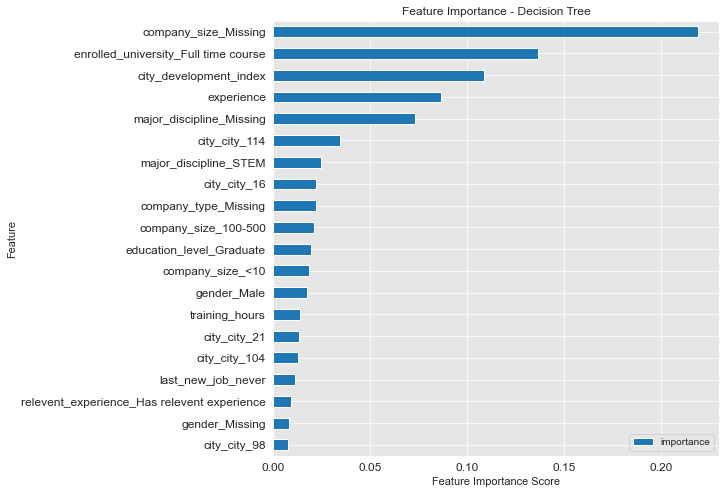

In [67]:
    feat_imp = pd.DataFrame(
        {'importance':best_decision_tree_model.feature_importances_}
    )    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:20]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title='Feature Importance - Decision Tree', 
                       figsize=(8,8), 
                       fontsize=12)
    plt.xlabel('Feature Importance Score', fontsize=11)
    plt.ylabel('Feature', fontsize=11)
    plt.show()

### Classification Report - Tuned Decision Tree

In [68]:
print('Classification Report for Training Data')
print(classification_report(y_train, best_decision_tree_model.predict(X_train),
                            target_names=['Not Looking for Job Change', 
                                          'Looking for a Job Change']))

print('Classification Report for Test Data')
print(classification_report(y_test, best_decision_tree_model.predict(X_test),
                            target_names=['Not Looking for Job Change', 
                                          'Looking for a Job Change']))

Classification Report for Training Data
                            precision    recall  f1-score   support

Not Looking for Job Change       0.86      0.69      0.76     10726
  Looking for a Job Change       0.41      0.66      0.51      3557

                  accuracy                           0.68     14283
                 macro avg       0.64      0.68      0.64     14283
              weighted avg       0.75      0.68      0.70     14283

Classification Report for Test Data
                            precision    recall  f1-score   support

Not Looking for Job Change       0.86      0.69      0.77      3576
  Looking for a Job Change       0.41      0.66      0.51      1185

                  accuracy                           0.68      4761
                 macro avg       0.64      0.67      0.64      4761
              weighted avg       0.75      0.68      0.70      4761



### Confusion Matrixes

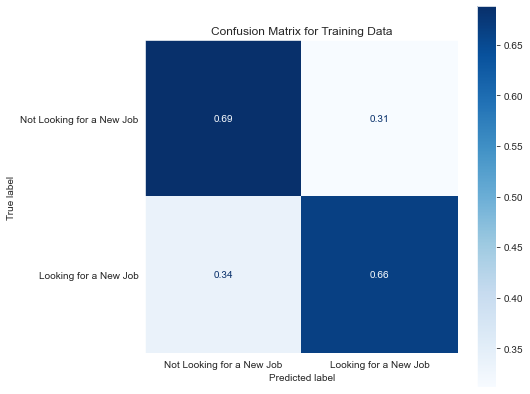

In [69]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(
    best_decision_tree_model, X_train, y_train, cmap='Blues', ax=ax, normalize='true')
ax.grid(False)
ax.set_title('Confusion Matrix for Training Data'); 
ax.xaxis.set_ticklabels(['Not Looking for a New Job', 'Looking for a New Job']); 
ax.yaxis.set_ticklabels(['Not Looking for a New Job', 'Looking for a New Job']);
#ax.plot(legend=False)
#fig.tight_layout()

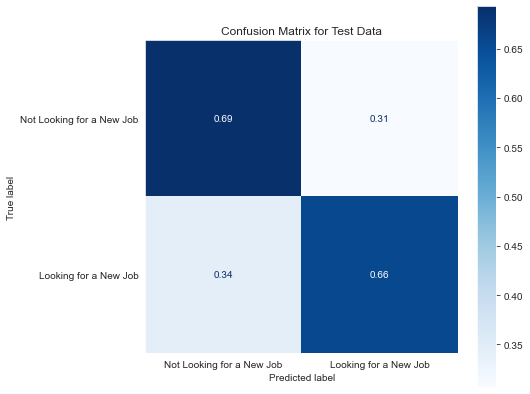

In [70]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(
    best_decision_tree_model, X_test, y_test, cmap='Blues', ax=ax, normalize='true')
ax.grid(False)
ax.set_title('Confusion Matrix for Test Data'); 
ax.xaxis.set_ticklabels(['Not Looking for a New Job', 'Looking for a New Job']); 
ax.yaxis.set_ticklabels(['Not Looking for a New Job', 'Looking for a New Job']);

## Random Forest Classifier 

In [71]:
from sklearn.ensemble import BaggingClassifier, RandomForestClassifier

In [72]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

random_forest_model = RandomForestClassifier(
    random_state=100, class_weight='balanced')

random_forest_model.fit(X_train, y_train)

y__pred_train = random_forest_model.predict(X_train)
y_pred_test = random_forest_model.predict(X_test)

### Classification Report - Pre-Tuning

In [73]:
print('Classification Report for Training Data')

print(classification_report(y_train, y_pred_train, 
                            target_names=['Not Looking for Job Change', 
                                          'Looking for a Job Change']))

print('Classification Report for Test Data')

print(classification_report(y_test, y_pred_test, 
                            target_names=['Not Looking for Job Change', 
                                          'Looking for a Job Change']))

Classification Report for Training Data
                            precision    recall  f1-score   support

Not Looking for Job Change       0.91      0.74      0.81     10726
  Looking for a Job Change       0.49      0.77      0.60      3557

                  accuracy                           0.74     14283
                 macro avg       0.70      0.75      0.71     14283
              weighted avg       0.80      0.74      0.76     14283

Classification Report for Test Data
                            precision    recall  f1-score   support

Not Looking for Job Change       0.83      0.90      0.86      3576
  Looking for a Job Change       0.58      0.44      0.50      1185

                  accuracy                           0.78      4761
                 macro avg       0.71      0.67      0.68      4761
              weighted avg       0.77      0.78      0.77      4761



###  Grid Search 

In [74]:
param_grid = { 
#   'n_estimators': [200, 500],
    'max_features': ['auto', 'sqrt', 'log2'],
    'max_depth' : [4,5,6,7,8],
    'criterion' :['gini', 'entropy']
}

random_forest_model_gridsearch = GridSearchCV(
    estimator=random_forest_model, 
    param_grid=param_grid, scoring='recall', verbose=2)

random_forest_model_gridsearch.fit(X_train, y_train)

Fitting 5 folds for each of 30 candidates, totalling 150 fits
[CV] criterion=gini, max_depth=4, max_features=auto ..................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ... criterion=gini, max_depth=4, max_features=auto, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto ..................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ... criterion=gini, max_depth=4, max_features=auto, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto ..................
[CV] ... criterion=gini, max_depth=4, max_features=auto, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto ..................
[CV] ... criterion=gini, max_depth=4, max_features=auto, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=auto ..................
[CV] ... criterion=gini, max_depth=4, max_features=auto, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=sqrt ..................
[CV] ... criterion=gini, max_depth=4, max_features=sqrt, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=sqrt ..................
[CV] ... criterion=gini, max_depth=4, max_features=sqrt, total=   0.4s
[CV] criterion=gini, max_depth=4, max_features=sqrt ..................
[CV] ... criterion=gini, max_depth=4, max_features=sqrt, total=   0.3s
[CV] criterion=gini, max_depth=4, max_features=sqrt ..................
[CV] .

[CV] ... criterion=gini, max_depth=7, max_features=log2, total=   0.4s
[CV] criterion=gini, max_depth=8, max_features=auto ..................
[CV] ... criterion=gini, max_depth=8, max_features=auto, total=   0.6s
[CV] criterion=gini, max_depth=8, max_features=auto ..................
[CV] ... criterion=gini, max_depth=8, max_features=auto, total=   0.9s
[CV] criterion=gini, max_depth=8, max_features=auto ..................
[CV] ... criterion=gini, max_depth=8, max_features=auto, total=   0.6s
[CV] criterion=gini, max_depth=8, max_features=auto ..................
[CV] ... criterion=gini, max_depth=8, max_features=auto, total=   0.6s
[CV] criterion=gini, max_depth=8, max_features=auto ..................
[CV] ... criterion=gini, max_depth=8, max_features=auto, total=   0.6s
[CV] criterion=gini, max_depth=8, max_features=sqrt ..................
[CV] ... criterion=gini, max_depth=8, max_features=sqrt, total=   0.5s
[CV] criterion=gini, max_depth=8, max_features=sqrt ..................
[CV] .

[CV]  criterion=entropy, max_depth=6, max_features=log2, total=   0.5s
[CV] criterion=entropy, max_depth=6, max_features=log2 ...............
[CV]  criterion=entropy, max_depth=6, max_features=log2, total=   0.4s
[CV] criterion=entropy, max_depth=6, max_features=log2 ...............
[CV]  criterion=entropy, max_depth=6, max_features=log2, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_features=auto ...............
[CV]  criterion=entropy, max_depth=7, max_features=auto, total=   0.6s
[CV] criterion=entropy, max_depth=7, max_features=auto ...............
[CV]  criterion=entropy, max_depth=7, max_features=auto, total=   0.5s
[CV] criterion=entropy, max_depth=7, max_features=auto ...............
[CV]  criterion=entropy, max_depth=7, max_features=auto, total=   0.6s
[CV] criterion=entropy, max_depth=7, max_features=auto ...............
[CV]  criterion=entropy, max_depth=7, max_features=auto, total=   0.4s
[CV] criterion=entropy, max_depth=7, max_features=auto ...............
[CV]  

[Parallel(n_jobs=1)]: Done 150 out of 150 | elapsed:  1.2min finished


GridSearchCV(estimator=RandomForestClassifier(class_weight='balanced',
                                              random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [4, 5, 6, 7, 8],
                         'max_features': ['auto', 'sqrt', 'log2']},
             scoring='recall', verbose=2)

In [75]:
random_forest_model_gridsearch.best_params_

{'criterion': 'gini', 'max_depth': 5, 'max_features': 'auto'}

### Tuned Model

In [76]:
best_random_forest_model = random_forest_model_gridsearch.best_estimator_

### Feature Importance

In [77]:
feat_imp = list(
    zip(X_train.columns, best_random_forest_model.feature_importances_))
sorted(feat_imp, key=lambda x: x[1], reverse=True)[:20]

[('city_development_index', 0.22740288904332817),
 ('city_city_21', 0.17010254010184192),
 ('company_size_Missing', 0.12485665123523287),
 ('company_type_Missing', 0.07039186963964708),
 ('company_type_Pvt Ltd', 0.06599291299775398),
 ('experience', 0.04436437517204363),
 ('enrolled_university_Full time course', 0.03466138198463109),
 ('enrolled_university_no_enrollment', 0.02275831512211493),
 ('relevent_experience_Has relevent experience', 0.020911139303026894),
 ('relevent_experience_No relevent experience', 0.017964797105444758),
 ('education_level_Graduate', 0.016538947979366413),
 ('company_size_100-500', 0.015319505097498543),
 ('city_city_114', 0.01393822136615138),
 ('city_city_16', 0.013709621233367523),
 ('major_discipline_Missing', 0.010996995730536467),
 ('city_city_103', 0.010899940231614908),
 ('company_size_50-99', 0.008633335029450571),
 ('gender_Male', 0.00862963684792497),
 ('city_city_11', 0.008070731806875397),
 ('education_level_High School', 0.007340281071872067)

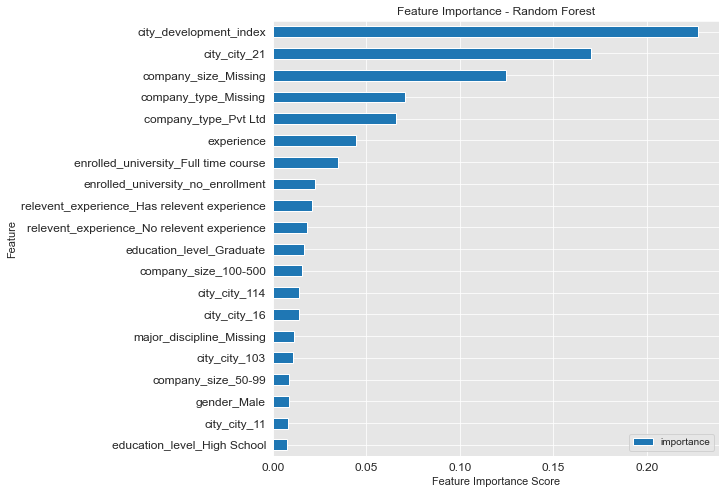

In [78]:
    feat_imp = pd.DataFrame(
        {'importance':best_random_forest_model.feature_importances_}
    )    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:20]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title='Feature Importance - Random Forest', 
                       figsize=(8,8), 
                       fontsize=12)
    plt.xlabel('Feature Importance Score', fontsize=11)
    plt.ylabel('Feature', fontsize=11)
    plt.show()

### Classification Report - Tuned Random Forest 

In [79]:
print('Classification Report for Training Data')
print(classification_report(y_train, best_random_forest_model.predict(X_train),
                            target_names=['Not Looking for Job Change', 
                                          'Looking for a Job Change']))

print('Classification Report for Test Data')
print(classification_report(y_test, best_random_forest_model.predict(X_test),
                            target_names=['Not Looking for Job Change', 
                                          'Looking for a Job Change']))

Classification Report for Training Data
                            precision    recall  f1-score   support

Not Looking for Job Change       0.91      0.75      0.82     10726
  Looking for a Job Change       0.51      0.77      0.61      3557

                  accuracy                           0.76     14283
                 macro avg       0.71      0.76      0.72     14283
              weighted avg       0.81      0.76      0.77     14283

Classification Report for Test Data
                            precision    recall  f1-score   support

Not Looking for Job Change       0.91      0.75      0.82      3576
  Looking for a Job Change       0.50      0.77      0.61      1185

                  accuracy                           0.75      4761
                 macro avg       0.71      0.76      0.71      4761
              weighted avg       0.81      0.75      0.77      4761



### Confusion Matrixes

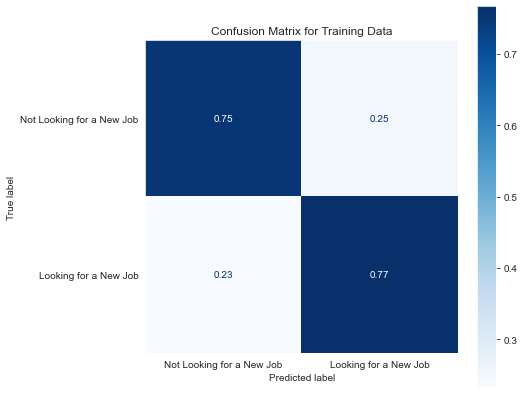

In [80]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(
    best_random_forest_model, X_train, y_train, cmap='Blues', 
    ax=ax, normalize='true')
ax.grid(False)
ax.set_title('Confusion Matrix for Training Data'); 
ax.xaxis.set_ticklabels(['Not Looking for a New Job', 'Looking for a New Job']); 
ax.yaxis.set_ticklabels(['Not Looking for a New Job', 'Looking for a New Job']);
#ax.plot(legend=False)
#fig.tight_layout()

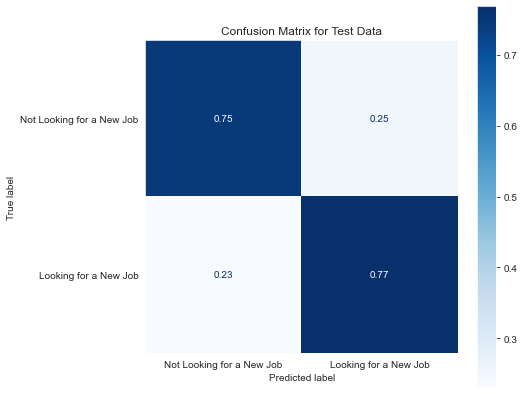

In [81]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(
    best_random_forest_model, X_test, y_test, cmap='Blues', 
    ax=ax, normalize='true')
ax.grid(False)
ax.set_title('Confusion Matrix for Test Data'); 
ax.xaxis.set_ticklabels(['Not Looking for a New Job', 'Looking for a New Job']); 
ax.yaxis.set_ticklabels(['Not Looking for a New Job', 'Looking for a New Job']);

## Gradient Boosting

In [82]:
from sklearn.ensemble import GradientBoostingClassifier

gradient_boost_model = GradientBoostingClassifier(
    learning_rate=0.1, n_estimators=100,max_depth=3, min_samples_split=2, 
    min_samples_leaf=1, subsample=1,max_features='sqrt', random_state=100)

gradient_boost_model.fit(X_train, y_train)

gradient_boost_model.score(X_test, y_test)

0.7889098928796471

In [83]:
y_pred_train = gradient_boost_model.predict(X_train)
y_pred_test = gradient_boost_model.predict(X_test)

### Classification Report - Pre-Tuning

In [84]:
print('Classification Report for Training Data')

print(classification_report(y_train, y_pred_train, 
                            target_names=['Not Looking for Job Change', 
                                          'Looking for a Job Change']))

print('Classification Report for Test Data')

print(classification_report(y_test, y_pred_test, 
                            target_names=['Not Looking for Job Change', 
                                          'Looking for a Job Change']))

Classification Report for Training Data
                            precision    recall  f1-score   support

Not Looking for Job Change       0.83      0.90      0.87     10726
  Looking for a Job Change       0.62      0.46      0.53      3557

                  accuracy                           0.79     14283
                 macro avg       0.73      0.68      0.70     14283
              weighted avg       0.78      0.79      0.78     14283

Classification Report for Test Data
                            precision    recall  f1-score   support

Not Looking for Job Change       0.83      0.90      0.87      3576
  Looking for a Job Change       0.60      0.45      0.52      1185

                  accuracy                           0.79      4761
                 macro avg       0.72      0.68      0.69      4761
              weighted avg       0.77      0.79      0.78      4761



### Grid Search 

In [85]:
param_grid = {
    "loss":["deviance"],
    "max_depth":[3,5,8],
    "max_features":["log2","sqrt","auto"],
    "subsample":[.5,.75,1],
   }

gradient_boost_model_gridsearch = GridSearchCV(
    gradient_boost_model, param_grid=param_grid, cv=10, n_jobs=1, 
    scoring='recall', verbose=2)

gradient_boost_model_gridsearch.fit(X_train, y_train)

Fitting 10 folds for each of 27 candidates, totalling 270 fits
[CV] loss=deviance, max_depth=3, max_features=log2, subsample=0.5 ....


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV]  loss=deviance, max_depth=3, max_features=log2, subsample=0.5, total=   0.4s
[CV] loss=deviance, max_depth=3, max_features=log2, subsample=0.5 ....


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV]  loss=deviance, max_depth=3, max_features=log2, subsample=0.5, total=   0.4s
[CV] loss=deviance, max_depth=3, max_features=log2, subsample=0.5 ....
[CV]  loss=deviance, max_depth=3, max_features=log2, subsample=0.5, total=   0.4s
[CV] loss=deviance, max_depth=3, max_features=log2, subsample=0.5 ....
[CV]  loss=deviance, max_depth=3, max_features=log2, subsample=0.5, total=   0.4s
[CV] loss=deviance, max_depth=3, max_features=log2, subsample=0.5 ....
[CV]  loss=deviance, max_depth=3, max_features=log2, subsample=0.5, total=   0.4s
[CV] loss=deviance, max_depth=3, max_features=log2, subsample=0.5 ....
[CV]  loss=deviance, max_depth=3, max_features=log2, subsample=0.5, total=   0.3s
[CV] loss=deviance, max_depth=3, max_features=log2, subsample=0.5 ....
[CV]  loss=deviance, max_depth=3, max_features=log2, subsample=0.5, total=   0.3s
[CV] loss=deviance, max_depth=3, max_features=log2, subsample=0.5 ....
[CV]  loss=deviance, max_depth=3, max_features=log2, subsample=0.5, total=   0.3s


[CV]  loss=deviance, max_depth=3, max_features=sqrt, subsample=1, total=   0.4s
[CV] loss=deviance, max_depth=3, max_features=sqrt, subsample=1 ......
[CV]  loss=deviance, max_depth=3, max_features=sqrt, subsample=1, total=   0.4s
[CV] loss=deviance, max_depth=3, max_features=sqrt, subsample=1 ......
[CV]  loss=deviance, max_depth=3, max_features=sqrt, subsample=1, total=   0.4s
[CV] loss=deviance, max_depth=3, max_features=sqrt, subsample=1 ......
[CV]  loss=deviance, max_depth=3, max_features=sqrt, subsample=1, total=   0.4s
[CV] loss=deviance, max_depth=3, max_features=sqrt, subsample=1 ......
[CV]  loss=deviance, max_depth=3, max_features=sqrt, subsample=1, total=   0.4s
[CV] loss=deviance, max_depth=3, max_features=auto, subsample=0.5 ....
[CV]  loss=deviance, max_depth=3, max_features=auto, subsample=0.5, total=   1.4s
[CV] loss=deviance, max_depth=3, max_features=auto, subsample=0.5 ....
[CV]  loss=deviance, max_depth=3, max_features=auto, subsample=0.5, total=   1.6s
[CV] loss=

[CV]  loss=deviance, max_depth=5, max_features=log2, subsample=0.75, total=   0.5s
[CV] loss=deviance, max_depth=5, max_features=log2, subsample=1 ......
[CV]  loss=deviance, max_depth=5, max_features=log2, subsample=1, total=   0.5s
[CV] loss=deviance, max_depth=5, max_features=log2, subsample=1 ......
[CV]  loss=deviance, max_depth=5, max_features=log2, subsample=1, total=   0.5s
[CV] loss=deviance, max_depth=5, max_features=log2, subsample=1 ......
[CV]  loss=deviance, max_depth=5, max_features=log2, subsample=1, total=   0.4s
[CV] loss=deviance, max_depth=5, max_features=log2, subsample=1 ......
[CV]  loss=deviance, max_depth=5, max_features=log2, subsample=1, total=   0.5s
[CV] loss=deviance, max_depth=5, max_features=log2, subsample=1 ......
[CV]  loss=deviance, max_depth=5, max_features=log2, subsample=1, total=   0.5s
[CV] loss=deviance, max_depth=5, max_features=log2, subsample=1 ......
[CV]  loss=deviance, max_depth=5, max_features=log2, subsample=1, total=   0.4s
[CV] loss=d

[CV]  loss=deviance, max_depth=5, max_features=auto, subsample=0.75, total=   2.9s
[CV] loss=deviance, max_depth=5, max_features=auto, subsample=0.75 ...
[CV]  loss=deviance, max_depth=5, max_features=auto, subsample=0.75, total=   2.6s
[CV] loss=deviance, max_depth=5, max_features=auto, subsample=0.75 ...
[CV]  loss=deviance, max_depth=5, max_features=auto, subsample=0.75, total=   2.6s
[CV] loss=deviance, max_depth=5, max_features=auto, subsample=0.75 ...
[CV]  loss=deviance, max_depth=5, max_features=auto, subsample=0.75, total=   2.6s
[CV] loss=deviance, max_depth=5, max_features=auto, subsample=0.75 ...
[CV]  loss=deviance, max_depth=5, max_features=auto, subsample=0.75, total=   2.6s
[CV] loss=deviance, max_depth=5, max_features=auto, subsample=0.75 ...
[CV]  loss=deviance, max_depth=5, max_features=auto, subsample=0.75, total=   2.8s
[CV] loss=deviance, max_depth=5, max_features=auto, subsample=0.75 ...
[CV]  loss=deviance, max_depth=5, max_features=auto, subsample=0.75, total= 

[CV]  loss=deviance, max_depth=8, max_features=sqrt, subsample=0.5, total=   0.9s
[CV] loss=deviance, max_depth=8, max_features=sqrt, subsample=0.5 ....
[CV]  loss=deviance, max_depth=8, max_features=sqrt, subsample=0.5, total=   0.9s
[CV] loss=deviance, max_depth=8, max_features=sqrt, subsample=0.5 ....
[CV]  loss=deviance, max_depth=8, max_features=sqrt, subsample=0.5, total=   0.9s
[CV] loss=deviance, max_depth=8, max_features=sqrt, subsample=0.75 ...
[CV]  loss=deviance, max_depth=8, max_features=sqrt, subsample=0.75, total=   1.0s
[CV] loss=deviance, max_depth=8, max_features=sqrt, subsample=0.75 ...
[CV]  loss=deviance, max_depth=8, max_features=sqrt, subsample=0.75, total=   1.1s
[CV] loss=deviance, max_depth=8, max_features=sqrt, subsample=0.75 ...
[CV]  loss=deviance, max_depth=8, max_features=sqrt, subsample=0.75, total=   1.1s
[CV] loss=deviance, max_depth=8, max_features=sqrt, subsample=0.75 ...
[CV]  loss=deviance, max_depth=8, max_features=sqrt, subsample=0.75, total=   1

[Parallel(n_jobs=1)]: Done 270 out of 270 | elapsed:  6.5min finished


GridSearchCV(cv=10,
             estimator=GradientBoostingClassifier(max_features='sqrt',
                                                  random_state=100,
                                                  subsample=1),
             n_jobs=1,
             param_grid={'loss': ['deviance'], 'max_depth': [3, 5, 8],
                         'max_features': ['log2', 'sqrt', 'auto'],
                         'subsample': [0.5, 0.75, 1]},
             scoring='recall', verbose=2)

In [86]:
gradient_boost_model_gridsearch.best_params_

{'loss': 'deviance', 'max_depth': 5, 'max_features': 'auto', 'subsample': 1}

### Tuned Model

In [87]:
best_gradient_boost_model = gradient_boost_model_gridsearch.best_estimator_
print(classification_report(y_train, best_gradient_boost_model.predict(X_train)))
print(classification_report(y_test, best_gradient_boost_model.predict(X_test)))

              precision    recall  f1-score   support

         0.0       0.88      0.89      0.89     10726
         1.0       0.67      0.64      0.66      3557

    accuracy                           0.83     14283
   macro avg       0.78      0.77      0.77     14283
weighted avg       0.83      0.83      0.83     14283

              precision    recall  f1-score   support

         0.0       0.86      0.86      0.86      3576
         1.0       0.58      0.56      0.57      1185

    accuracy                           0.79      4761
   macro avg       0.72      0.71      0.72      4761
weighted avg       0.79      0.79      0.79      4761



### Feature Importance

In [88]:
feat_imp = list(
    zip(X_train.columns, best_gradient_boost_model.feature_importances_))
sorted(feat_imp, key=lambda x: x[1], reverse=True)[:20]

[('city_development_index', 0.4132762929116181),
 ('company_size_Missing', 0.1828786241596875),
 ('education_level_Graduate', 0.04855039297895594),
 ('training_hours', 0.045206809665645074),
 ('experience', 0.04268205694237325),
 ('city_city_103', 0.028970240447780928),
 ('major_discipline_Missing', 0.019076822021671824),
 ('company_type_Pvt Ltd', 0.014943134624447822),
 ('last_new_job_never', 0.012863391338347588),
 ('city_city_160', 0.011568969187002846),
 ('education_level_Masters', 0.010483021668422741),
 ('company_type_Missing', 0.009114684169909572),
 ('last_new_job_1', 0.00822829735921949),
 ('relevent_experience_No relevent experience', 0.007787638960791248),
 ('relevent_experience_Has relevent experience', 0.007190143360342924),
 ('enrolled_university_Full time course', 0.006125375599436206),
 ('enrolled_university_no_enrollment', 0.0054262613354732194),
 ('gender_Missing', 0.004519114013987973),
 ('company_type_Public Sector', 0.0040710975783029004),
 ('company_size_10/49', 0

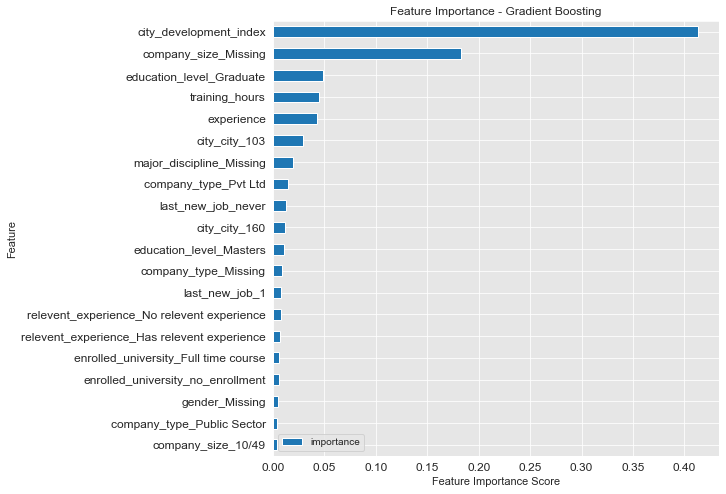

In [89]:
    feat_imp = pd.DataFrame(
        {'importance':best_gradient_boost_model.feature_importances_}
    )    
    feat_imp['feature'] = X_train.columns
    feat_imp.sort_values(by='importance', ascending=False, inplace=True)
    feat_imp = feat_imp.iloc[:20]
    
    feat_imp.sort_values(by='importance', inplace=True)
    feat_imp = feat_imp.set_index('feature', drop=True)
    feat_imp.plot.barh(title='Feature Importance - Gradient Boosting', 
                       figsize=(8,8), 
                       fontsize=12)
    plt.xlabel('Feature Importance Score', fontsize=11)
    plt.ylabel('Feature', fontsize=11)
    plt.show()

### Classification Report - Tuned Gradient Boosting

In [90]:
print('Classification Report for Training Data')
print(classification_report(y_train, best_gradient_boost_model.predict(X_train),
                            target_names=['Not Looking for Job Change', 
                                          'Looking for a Job Change']))

print('Classification Report for Test Data')
print(classification_report(y_test, best_gradient_boost_model.predict(X_test),
                            target_names=['Not Looking for Job Change', 
                                          'Looking for a Job Change']))

Classification Report for Training Data
                            precision    recall  f1-score   support

Not Looking for Job Change       0.88      0.89      0.89     10726
  Looking for a Job Change       0.67      0.64      0.66      3557

                  accuracy                           0.83     14283
                 macro avg       0.78      0.77      0.77     14283
              weighted avg       0.83      0.83      0.83     14283

Classification Report for Test Data
                            precision    recall  f1-score   support

Not Looking for Job Change       0.86      0.86      0.86      3576
  Looking for a Job Change       0.58      0.56      0.57      1185

                  accuracy                           0.79      4761
                 macro avg       0.72      0.71      0.72      4761
              weighted avg       0.79      0.79      0.79      4761



### Confusion Matrixes

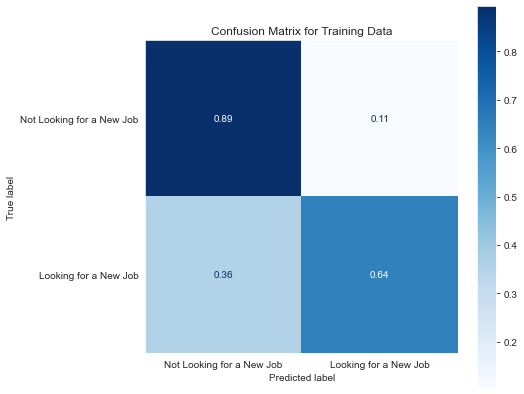

In [91]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(
    best_gradient_boost_model, X_train, y_train, cmap='Blues', ax=ax, normalize='true')
ax.grid(False)
ax.set_title('Confusion Matrix for Training Data'); 
ax.xaxis.set_ticklabels(['Not Looking for a New Job', 'Looking for a New Job']); 
ax.yaxis.set_ticklabels(['Not Looking for a New Job', 'Looking for a New Job']);

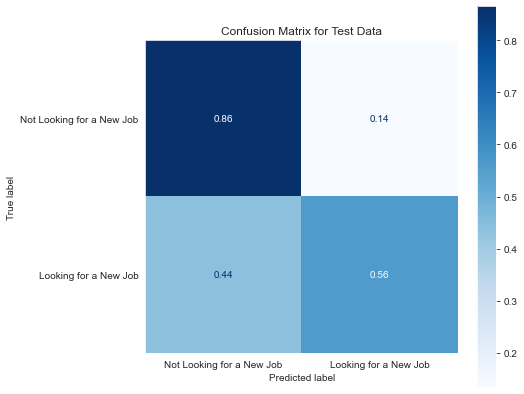

In [92]:
fig, ax = plt.subplots(figsize=(7,7))
plot_confusion_matrix(
    best_gradient_boost_model, X_test, y_test, cmap='Blues', ax=ax, normalize='true')
ax.grid(False)
ax.set_title('Confusion Matrix for Test Data'); 
ax.xaxis.set_ticklabels(['Not Looking for a New Job', 'Looking for a New Job']); 
ax.yaxis.set_ticklabels(['Not Looking for a New Job', 'Looking for a New Job']);

# Evaluation and Conclusions

After evaluating several classification models (logistic regression, decision tree, random forest, and gradient boosting), we've chosen Random Forest as the model to determine whether candidates are likely to change careers. 

**Conclusions** 
- Because our data is imbalanced and 75% of candidates are "Not Looking for a Job Change," the metric we used to measure our models' performances was Recall because we care most about how our models predict True Positives (employees "Looking for a Job Change") that actually are looking for a job change
- The Recall using Random Forest is 77% (vs. Logistic Regression @ 40%, Decision Tree @ 66%, and Gradient Boosting @ 56%) 
- Our model is expected to predict True Positives (i.e. predict employees "Looking for a Job Change" that are actually looking for a job change) 77% of the time
- Within our Random Forest model, City Development Index was the most important feature/determinant of whether a candidate was looking for a job change 
- Overall, using this model is a more robust, data-driven approach compared with the company's current approach of scanning resumes for potential Data Science talent  

# Future Work 

**Future work:** 
* Work with the company to identify recruitment opportunities and strategies for their Data Science education program (recruit more females; recruit 'unlikely' candidates that do not have a background in STEM; recruit in various cities) 
* Suggest another round of Data Science training curriculum following these suggestions 
* Gather more data following Round 2 and re-run models 
* Continue refining overall process and models 
* Make sure all who want to explore Data Science have the opportunity! 